<a href="https://www.kaggle.com/code/mirzaabbasuddin/logistic-regression-multiclass-classification?scriptVersionId=135155874" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd

In [2]:
# loading the dataset
df = pd.read_excel('/kaggle/input/date-fruit-datasets/Date_Fruit_Datasets/Date_Fruit_Datasets.xlsx')
df.head(30)

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI
5,408953,2326.6931,840.1821,622.0076,0.6722,721.5921,0.9974,410036,0.7805,1.3508,...,3.6309,6.0285,6.2159,-41140371456,-33146710016,-27907301376,49.7001,45.3190,39.7371,BERHI
6,451414,2457.2080,889.3253,652.4316,0.6796,758.1281,0.9970,452755,0.7877,1.3631,...,3.0703,3.4163,4.9168,-63711666176,-64060743680,-52603465728,57.8060,58.5449,52.4199,BERHI
7,382636,2275.7791,808.0833,609.2819,0.6569,697.9880,0.9931,385277,0.7032,1.3263,...,3.6756,7.0258,5.3254,-29873577984,-33570080768,-33054025728,45.1768,48.2407,47.2167,BERHI
8,546063,2714.9480,916.3737,766.4536,0.5481,833.8279,0.9882,552598,0.7710,1.1956,...,3.4640,3.7416,4.8120,-95262416896,-79321833472,-69569445888,64.6188,59.9127,55.6509,BERHI
9,420044,2391.1230,836.9280,645.1822,0.6370,731.3116,0.9918,423531,0.7853,1.2972,...,3.3729,4.2898,5.4637,-74341122048,-58172182528,-42640556032,64.9094,58.2771,48.4820,BERHI


In [3]:
# classes we have
df['Class'].value_counts()

DOKOL     204
SAFAVI    199
ROTANA    166
DEGLET     98
SOGAY      94
IRAQI      72
BERHI      65
Name: Class, dtype: int64

**Representing Class By Number Using One Hot Encoding**

In [4]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [5]:
# Applying one-hot encoding
df['Class_N'] = label.fit_transform(df['Class'])
df

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class,Class_N
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI,0
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI,0
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI,0
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI,0
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028,0.7269,1.4499,...,2.3704,2.7202,-25296416768,-19168882688,-18473392128,49.0869,43.0422,42.4153,SOGAY,6
894,365924,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566,0.6695,1.5510,...,3.5805,3.9910,-31605219328,-21945366528,-19277905920,46.8086,39.1046,36.5502,SOGAY,6
895,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255,0.7240,1.7159,...,2.5090,2.6951,-22242772992,-19594921984,-17592152064,44.1325,40.7986,40.9769,SOGAY,6
896,238955,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795,0.6954,1.6220,...,2.6874,2.7991,-26048595968,-21299822592,-19809978368,51.2267,45.7162,45.6260,SOGAY,6


In [6]:
# checaking that is there any missing values or not
for col in df.columns:
    print(df[col].isna().value_counts())

False    898
Name: AREA, dtype: int64
False    898
Name: PERIMETER, dtype: int64
False    898
Name: MAJOR_AXIS, dtype: int64
False    898
Name: MINOR_AXIS, dtype: int64
False    898
Name: ECCENTRICITY, dtype: int64
False    898
Name: EQDIASQ, dtype: int64
False    898
Name: SOLIDITY, dtype: int64
False    898
Name: CONVEX_AREA, dtype: int64
False    898
Name: EXTENT, dtype: int64
False    898
Name: ASPECT_RATIO, dtype: int64
False    898
Name: ROUNDNESS, dtype: int64
False    898
Name: COMPACTNESS, dtype: int64
False    898
Name: SHAPEFACTOR_1, dtype: int64
False    898
Name: SHAPEFACTOR_2, dtype: int64
False    898
Name: SHAPEFACTOR_3, dtype: int64
False    898
Name: SHAPEFACTOR_4, dtype: int64
False    898
Name: MeanRR, dtype: int64
False    898
Name: MeanRG, dtype: int64
False    898
Name: MeanRB, dtype: int64
False    898
Name: StdDevRR, dtype: int64
False    898
Name: StdDevRG, dtype: int64
False    898
Name: StdDevRB, dtype: int64
False    898
Name: SkewRR, dtype: int64
False    

In [7]:
# grabbing the X and y for the model
X = df.loc[:,'AREA':'ALLdaub4RB']
y = df['Class_N']

**Spliting the Dataset Into Train and Test**

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(718, 34)
(180, 34)
(718,)
(180,)


**Training The Model**

In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [11]:
model.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
y_predicted = model.predict(X_test)

In [13]:
# chceking the score
model.score(X_test,y_test)

0.5222222222222223

In [14]:
# creating a new dataframe to see the result
result_df = pd.DataFrame({'y_true':y_test,'y_predicted':y_predicted})
result_df

,y_true,y_predicted
201,2,4
127,1,4
282,2,4
430,3,2
390,3,3
...,...,...
311,2,3
188,2,4
152,1,6
194,2,5


In [15]:
import numpy as np
result_df['Match'] = np.where(result_df['y_true']==result_df['y_predicted'],'Yes','No')
result_df

,y_true,y_predicted,Match
201,2,4,No
127,1,4,No
282,2,4,No
430,3,2,No
390,3,3,Yes
...,...,...,...
311,2,3,No
188,2,4,No
152,1,6,No
194,2,5,No


In [16]:
result_df['Match'].value_counts()

Yes    94
No     86
Name: Match, dtype: int64

**Generating Confusion Matrix**

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[ 0,  0,  3,  5,  4,  0,  3],
       [ 0,  0,  5,  0, 18,  1,  4],
       [ 0,  0, 14,  3, 17,  3,  2],
       [ 0,  0,  1,  7,  5,  1,  0],
       [ 0,  0,  3,  0, 30,  0,  0],
       [ 0,  0,  0,  3,  1, 34,  0],
       [ 0,  0,  0,  0,  4,  0,  9]])

**Plotting The Matrix With Seaborn For Better Visualization**

In [18]:
import seaborn as sn
import matplotlib.pyplot as plt

Text(83.22222222222221, 0.5, 'True Value')

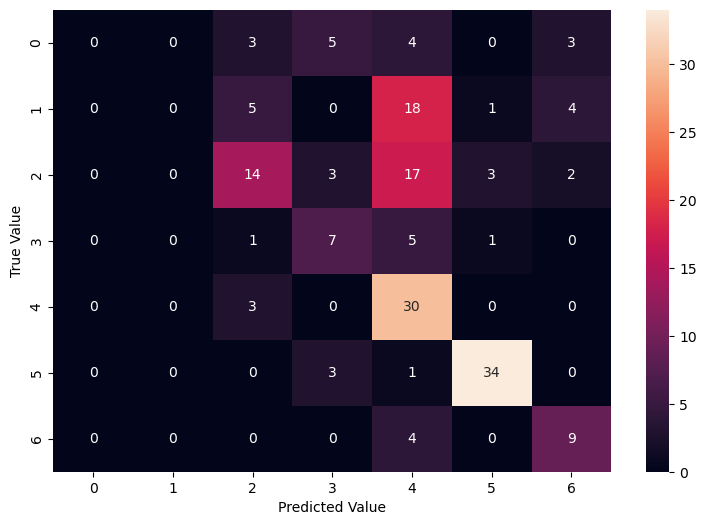

In [19]:
plt.figure(figsize = (9,6))
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')